# Development Environment
## Docker build

docker build -f Dockerfile_lambda -t spam-classifier-lambda:py311 .

## Run in Docker

docker run -d -p 9696:8080 --name spam-classifier-lambda spam-classifier-lambda:py311


In [6]:
#test docker and lmabda service
!python test_lambda_docker.py

{
  "statusCode": 200,
  "headers": {
    "Content-Type": "application/json",
    "Access-Control-Allow-Origin": "*"
  },
  "body": "{\"Spam_probability\": 0.9996296296296296, \"Spam\": true}"
}


# AWS Cloud deployment
## Deploy to AWS Lambda as container

### Install AWS cli
pip install awscli

### Create AWS Repo in ecr (cmd line or from console)

aws ecr create-repository --repository-name spam-classifier-images

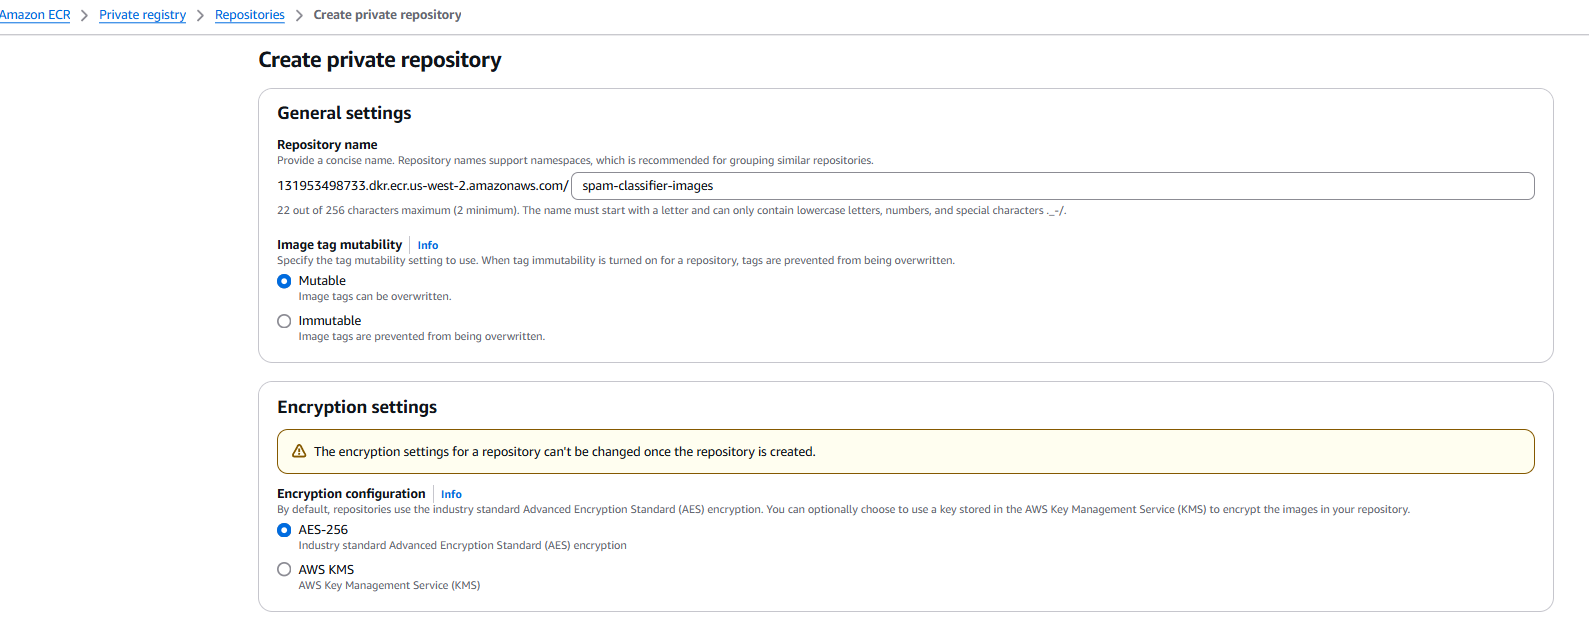

### Attach the following policies to the user
```
{
    "Version": "2012-10-17",
    "Statement": [
        {
            "Effect": "Allow",
            "Action": [
                "ecr:GetAuthorizationToken",
                "ecr:BatchCheckLayerAvailability",
                "ecr:BatchGetImage",
                "ecr:DescribeRepositories",
                "ecr:ListImages"
            ],
            "Resource": "*"
        }
    ]
}


{
    "Version": "2012-10-17",
    "Statement": [
        {
            "Effect": "Allow",
            "Action": [
                "ecr:InitiateLayerUpload",
                "ecr:UploadLayerPart",
                "ecr:CompleteLayerUpload",
                "ecr:PutImage",
                "ecr:BatchCheckLayerAvailability",
                "ecr:BatchGetImage",
                "ecr:GetDownloadUrlForLayer"
            ],
            "Resource": "[replace with your ecr arn]"
        }
    ]
}

```

### Execuet the following command(S) in cmd/terminal window 

For image build use the following docker command:

docker build -f Dockerfile_lambda -t spam-classifier-images .


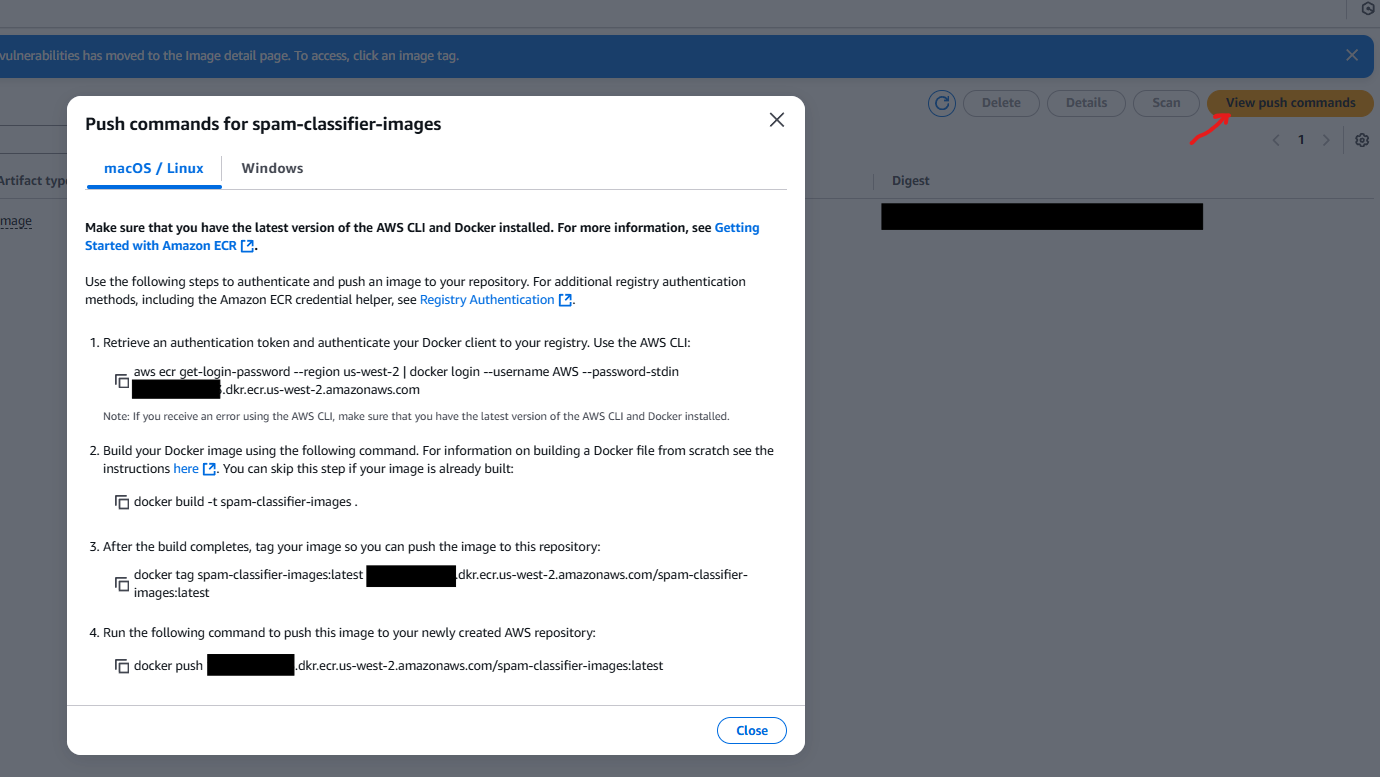

### AWS Lambda function

### Create Lambda function
```
Using the image uri to create lambda function from a container
```
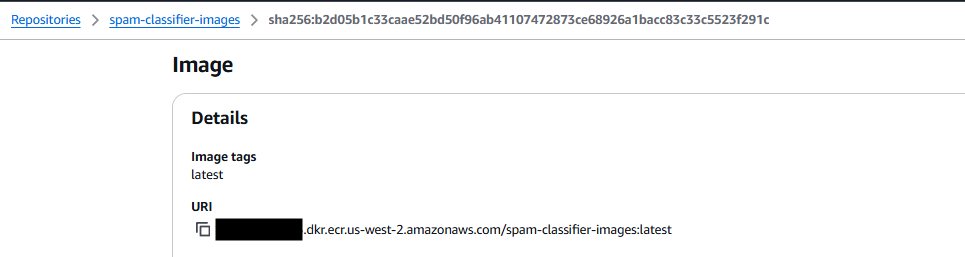

### Lambda function configuration
```
Increase timeout to large amout to accout for loading the model.

Create test site:
{
  "site": {
    "having_ip_address": -1,
    "url_length": -1,
    "shortining_service": 1,
    "having_at_symbol": 1,
    "double_slash_redirecting": 1,
    "prefix_suffix": -1,
    "having_sub_domain": 1,
    "sslfinal_state": -1,
    "domain_registeration_length": 1,
    "favicon": 1,
    "port": 1,
    "https_token": 1,
    "request_url": -1,
    "url_of_anchor": -1,
    "links_in_tags": 0,
    "sfh": 1,
    "submitting_to_email": 1,
    "abnormal_url": 1,
    "redirect": 0,
    "on_mouseover": 1,
    "rightclick": 1,
    "popupwidnow": 1,
    "iframe": 1,
    "age_of_domain": -1,
    "dnsrecord": 1,
    "web_traffic": -1,
    "page_rank": -1,
    "google_index": 1,
    "links_pointing_to_page": 1,
    "statistical_report": 1
  }
}
```

### Run the test inside the lambda function
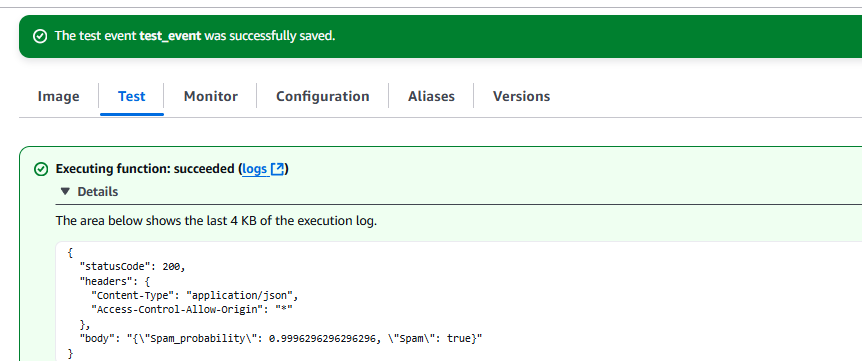


#### Youtube help

https://www.youtube.com/watch?v=nZU9_2bTNTM&ab_channel=MyCloudTutorials

### Create API Gateway

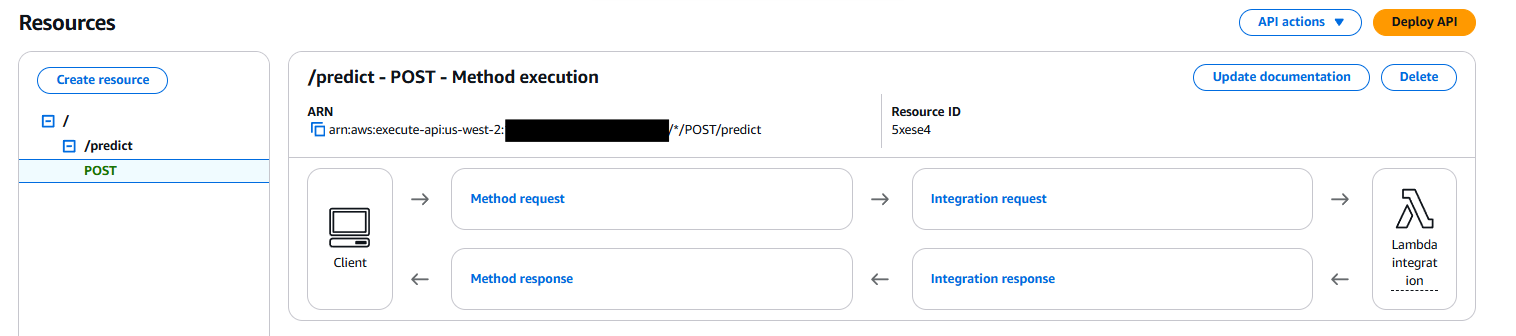

### Test API Gateway to Lambda
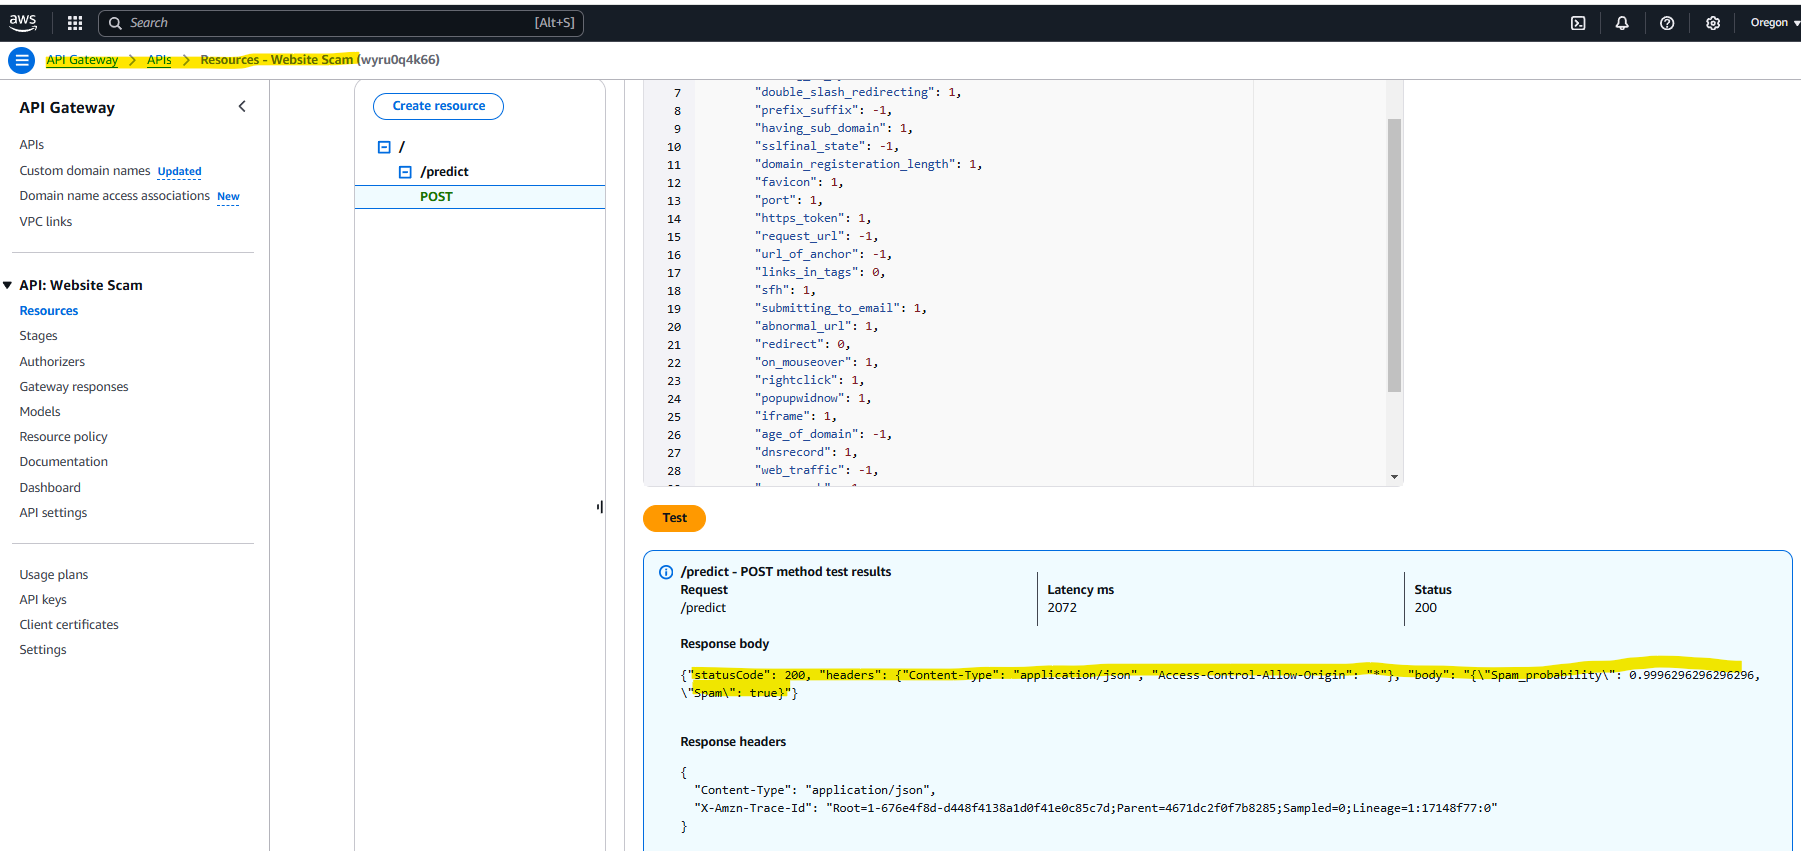

### Deploy API as Public
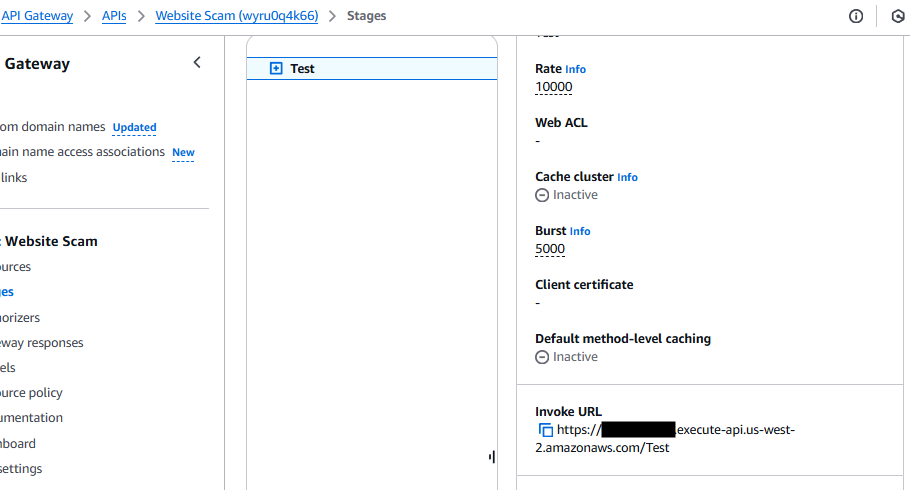

###  Test Public API
```
open test_lambda_gateway.py
replace url with the <<invoke url>> from deploy api.
run:  python test_lambda_gateway.py
```

In [1]:
!python test_lambda_gateway.py

{
  "statusCode": 200,
  "headers": {
    "Content-Type": "application/json",
    "Access-Control-Allow-Origin": "*"
  },
  "body": "{\"Spam_probability\": 0.9996296296296296, \"Spam\": true}"
}
